# Project #4 Data Cleaning with Anime Data Set

### Importing Packages

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import re

In [2]:
from pathlib import Path
import plotly.express as px
import seaborn as sns

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

## 1st Data Set

### Importing Data

In [4]:
Peter_Path1 = "anime.csv"
Anime = pd.read_csv(os.path.normpath(Peter_Path1))
Anime

,Anime,Release_date,Length,Genre,Rating
0,Fullmetal Alchemist: Brotherhood,(2009-2010),24 min,"Animation, Action, Adventure",9.1
1,Attack on Titan,(2013-2023),24 min,"Animation, Action, Adventure",9.0
2,Hunter x Hunter,(2011-2014),24 min,"Animation, Action, Adventure",9.0
3,Bleach: Thousand-Year Blood War,(2022- ),24 min,"Animation, Action, Adventure",9.0
4,Ginga eiyû densetsu,(1988-1997),25 min,"Animation, Action, Drama",9.0
...,...,...,...,...,...
176,Isekai Meikyuu de Harem o,-2022.0,24 min,"Animation, Action, Adventure",6.3
177,Yasuke,-2021.0,30 min,"Animation, Action, Adventure",6.2
178,Ikki Tousen,(2003- ),325 min,"Animation, Action, Adventure",5.9
179,Bakugan Savaşçıları,(2007-2011),22 min,"Animation, Action, Adventure",5.7


In [5]:
Anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Anime         181 non-null    object 
 1   Release_date  181 non-null    object 
 2   Length        167 non-null    object 
 3   Genre         181 non-null    object 
 4   Rating        181 non-null    float64
dtypes: float64(1), object(4)
memory usage: 7.2+ KB


## Data Cleaning

In [6]:
Genres = Anime["Genre"].str.split(pat=',', n=0, expand=True)

In [7]:
Genres[0] = Genres[0].str.strip()
Genres[1] = Genres[1].str.strip()
Genres[2] = Genres[2].str.strip()

In [8]:
Genres.rename(columns={0: "Genre_1",
                       1: "Genre_2",
                       2: "Genre_3"}, inplace = True)

In [9]:
Anime = pd.concat([Anime, Genres], axis=1)
Anime

,Anime,Release_date,Length,Genre,Rating,Genre_1,Genre_2,Genre_3
0,Fullmetal Alchemist: Brotherhood,(2009-2010),24 min,"Animation, Action, Adventure",9.1,Animation,Action,Adventure
1,Attack on Titan,(2013-2023),24 min,"Animation, Action, Adventure",9.0,Animation,Action,Adventure
2,Hunter x Hunter,(2011-2014),24 min,"Animation, Action, Adventure",9.0,Animation,Action,Adventure
3,Bleach: Thousand-Year Blood War,(2022- ),24 min,"Animation, Action, Adventure",9.0,Animation,Action,Adventure
4,Ginga eiyû densetsu,(1988-1997),25 min,"Animation, Action, Drama",9.0,Animation,Action,Drama
...,...,...,...,...,...,...,...,...
176,Isekai Meikyuu de Harem o,-2022.0,24 min,"Animation, Action, Adventure",6.3,Animation,Action,Adventure
177,Yasuke,-2021.0,30 min,"Animation, Action, Adventure",6.2,Animation,Action,Adventure
178,Ikki Tousen,(2003- ),325 min,"Animation, Action, Adventure",5.9,Animation,Action,Adventure
179,Bakugan Savaşçıları,(2007-2011),22 min,"Animation, Action, Adventure",5.7,Animation,Action,Adventure


In [10]:
Anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Anime         181 non-null    object 
 1   Release_date  181 non-null    object 
 2   Length        167 non-null    object 
 3   Genre         181 non-null    object 
 4   Rating        181 non-null    float64
 5   Genre_1       181 non-null    object 
 6   Genre_2       181 non-null    object 
 7   Genre_3       180 non-null    object 
dtypes: float64(1), object(7)
memory usage: 11.4+ KB


In [11]:
Anime["Genre_3"].fillna("No Genre", inplace = True)

In [12]:
Anime["Genre"].value_counts()

Animation, Action, Adventure     74
Animation, Comedy, Drama         24
Animation, Action, Comedy        19
Animation, Action, Drama         13
Animation, Comedy, Fantasy       11
Animation, Comedy, Romance       11
Animation, Adventure, Comedy      6
Animation, Action, Crime          6
Animation, Adventure, Drama       3
Animation, Crime, Drama           3
Animation, Drama, Family          1
Animation, Adventure, Mystery     1
Animation, Short, Comedy          1
Animation, Drama, Fantasy         1
Animation, Drama, Horror          1
Animation, Drama, Thriller        1
Animation, Comedy                 1
Animation, Action, Sci-Fi         1
Animation, Drama, Mystery         1
Animation, Adventure, Fantasy     1
Animation, Action, Fantasy        1
Name: Genre, dtype: int64

In [13]:
Anime["Genre_1"].value_counts()

Animation    181
Name: Genre_1, dtype: int64

In [14]:
Anime["Genre_2"].value_counts()

Action       114
Comedy        47
Adventure     11
Drama          5
Crime          3
Short          1
Name: Genre_2, dtype: int64

In [15]:
Anime["Genre_3"].value_counts()

Adventure    74
Drama        43
Comedy       26
Fantasy      14
Romance      11
Crime         6
Mystery       2
Family        1
Horror        1
Thriller      1
No Genre      1
Sci-Fi        1
Name: Genre_3, dtype: int64

In [16]:
Anime["Genre 2"] = Anime[["Genre_2", 'Genre_3']].agg(' and '.join, axis=1)
Anime

,Anime,Release_date,Length,Genre,Rating,Genre_1,Genre_2,Genre_3,Genre 2
0,Fullmetal Alchemist: Brotherhood,(2009-2010),24 min,"Animation, Action, Adventure",9.1,Animation,Action,Adventure,Action and Adventure
1,Attack on Titan,(2013-2023),24 min,"Animation, Action, Adventure",9.0,Animation,Action,Adventure,Action and Adventure
2,Hunter x Hunter,(2011-2014),24 min,"Animation, Action, Adventure",9.0,Animation,Action,Adventure,Action and Adventure
3,Bleach: Thousand-Year Blood War,(2022- ),24 min,"Animation, Action, Adventure",9.0,Animation,Action,Adventure,Action and Adventure
4,Ginga eiyû densetsu,(1988-1997),25 min,"Animation, Action, Drama",9.0,Animation,Action,Drama,Action and Drama
...,...,...,...,...,...,...,...,...,...
176,Isekai Meikyuu de Harem o,-2022.0,24 min,"Animation, Action, Adventure",6.3,Animation,Action,Adventure,Action and Adventure
177,Yasuke,-2021.0,30 min,"Animation, Action, Adventure",6.2,Animation,Action,Adventure,Action and Adventure
178,Ikki Tousen,(2003- ),325 min,"Animation, Action, Adventure",5.9,Animation,Action,Adventure,Action and Adventure
179,Bakugan Savaşçıları,(2007-2011),22 min,"Animation, Action, Adventure",5.7,Animation,Action,Adventure,Action and Adventure


In [17]:
Anime.drop(["Genre", "Genre_1"], axis=1, inplace=True)

In [18]:
Anime.rename(columns={"Genre 2": "Genre",
                      "Genre_2": "Genre 1",
                      "Genre_3": "Genre 2"}, inplace = True)

In [19]:
Anime["Length"].value_counts()

24 min     93
25 min     26
23 min     24
30 min     10
22 min      6
851 min     1
650 min     1
21 min      1
15 min      1
122 min     1
100 min     1
45 min      1
325 min     1
Name: Length, dtype: int64

In [20]:
Time = Anime["Length"].str.split(pat=' ', n=0, expand=True)
Time

,0,1
0,24,min
1,24,min
2,24,min
3,24,min
4,25,min
...,...,...
176,24,min
177,30,min
178,325,min
179,22,min


In [21]:
Time.rename(columns={0: "Show Runtime"}, inplace=True)
Time.drop(1, axis=1, inplace=True)
Time

,Show Runtime
0,24
1,24
2,24
3,24
4,25
...,...
176,24
177,30
178,325
179,22


In [22]:
Anime = pd.concat([Anime, Time], axis=1)
Anime

,Anime,Release_date,Length,Rating,Genre 1,Genre 2,Genre,Show Runtime
0,Fullmetal Alchemist: Brotherhood,(2009-2010),24 min,9.1,Action,Adventure,Action and Adventure,24
1,Attack on Titan,(2013-2023),24 min,9.0,Action,Adventure,Action and Adventure,24
2,Hunter x Hunter,(2011-2014),24 min,9.0,Action,Adventure,Action and Adventure,24
3,Bleach: Thousand-Year Blood War,(2022- ),24 min,9.0,Action,Adventure,Action and Adventure,24
4,Ginga eiyû densetsu,(1988-1997),25 min,9.0,Action,Drama,Action and Drama,25
...,...,...,...,...,...,...,...,...
176,Isekai Meikyuu de Harem o,-2022.0,24 min,6.3,Action,Adventure,Action and Adventure,24
177,Yasuke,-2021.0,30 min,6.2,Action,Adventure,Action and Adventure,30
178,Ikki Tousen,(2003- ),325 min,5.9,Action,Adventure,Action and Adventure,325
179,Bakugan Savaşçıları,(2007-2011),22 min,5.7,Action,Adventure,Action and Adventure,22


In [23]:
col = Anime.pop("Show Runtime")
Anime.insert(2, col.name, col)
Anime

,Anime,Release_date,Show Runtime,Length,Rating,Genre 1,Genre 2,Genre
0,Fullmetal Alchemist: Brotherhood,(2009-2010),24,24 min,9.1,Action,Adventure,Action and Adventure
1,Attack on Titan,(2013-2023),24,24 min,9.0,Action,Adventure,Action and Adventure
2,Hunter x Hunter,(2011-2014),24,24 min,9.0,Action,Adventure,Action and Adventure
3,Bleach: Thousand-Year Blood War,(2022- ),24,24 min,9.0,Action,Adventure,Action and Adventure
4,Ginga eiyû densetsu,(1988-1997),25,25 min,9.0,Action,Drama,Action and Drama
...,...,...,...,...,...,...,...,...
176,Isekai Meikyuu de Harem o,-2022.0,24,24 min,6.3,Action,Adventure,Action and Adventure
177,Yasuke,-2021.0,30,30 min,6.2,Action,Adventure,Action and Adventure
178,Ikki Tousen,(2003- ),325,325 min,5.9,Action,Adventure,Action and Adventure
179,Bakugan Savaşçıları,(2007-2011),22,22 min,5.7,Action,Adventure,Action and Adventure


In [24]:
col = Anime.pop("Genre")
Anime.insert(5, col.name, col)
Anime

,Anime,Release_date,Show Runtime,Length,Rating,Genre,Genre 1,Genre 2
0,Fullmetal Alchemist: Brotherhood,(2009-2010),24,24 min,9.1,Action and Adventure,Action,Adventure
1,Attack on Titan,(2013-2023),24,24 min,9.0,Action and Adventure,Action,Adventure
2,Hunter x Hunter,(2011-2014),24,24 min,9.0,Action and Adventure,Action,Adventure
3,Bleach: Thousand-Year Blood War,(2022- ),24,24 min,9.0,Action and Adventure,Action,Adventure
4,Ginga eiyû densetsu,(1988-1997),25,25 min,9.0,Action and Drama,Action,Drama
...,...,...,...,...,...,...,...,...
176,Isekai Meikyuu de Harem o,-2022.0,24,24 min,6.3,Action and Adventure,Action,Adventure
177,Yasuke,-2021.0,30,30 min,6.2,Action and Adventure,Action,Adventure
178,Ikki Tousen,(2003- ),325,325 min,5.9,Action and Adventure,Action,Adventure
179,Bakugan Savaşçıları,(2007-2011),22,22 min,5.7,Action and Adventure,Action,Adventure


In [25]:
Anime.rename(columns={"Release_date": "Release Date"}, inplace=True)

In [26]:
Date = Anime["Release Date"].str.split(pat='-', n=0, expand=True)

In [27]:
Date

,0,1
0,(2009,2010)
1,(2013,2023)
2,(2011,2014)
3,(2022,)
4,(1988,1997)
...,...,...
176,,2022.0
177,,2021.0
178,(2003,)
179,(2007,2011)


In [28]:
Date[0] =  Date[0].str.replace('\W', '', regex=True)

In [29]:
Date[0].value_counts()

         49
2019     14
2021     10
2015      8
2014      7
2011      7
2022      7
2020      7
2016      6
2018      6
2012      6
2008      5
2013      5
2009      5
2017      4
2002      4
2006      4
2005      3
2023      3
2003      2
1999      2
2004      2
2007      2
1986      1
1995      1
1998      1
1997      1
1989      1
1988      1
1978      1
2001      1
1963      1
2000      1
2010      1
I2021     1
1994      1
Name: 0, dtype: int64

In [30]:
Date[0].replace("I2021", "2021", inplace=True)

In [31]:
Date[1] =  Date[1].str.replace('\W', '', regex=True)

In [32]:
Date[1].value_counts()

         37
2023     17
20220    12
2021      7
20230     6
2022      6
20210     6
2010      5
2015      5
2019      5
20060     5
2017      4
2018      4
2013      4
2020      4
2007      3
2012      3
20140     3
2011      2
2016      2
2009      2
2006      2
20080     2
20180     2
20200     2
2004      2
2008      2
2005      2
1996      2
2014      2
20190     2
1965      1
1995      1
2003      1
20130     1
20120     1
20110     1
20030     1
2001      1
20070     1
1997      1
2002      1
1980      1
19860     1
20170     1
20100     1
1998      1
1989      1
19850     1
1999      1
Name: 1, dtype: int64

In [33]:
Date[1] = Date[1].str[:4]

In [34]:
Date.rename(columns={0: "Start Year",
                     1: "End Year"}, inplace = True)

In [35]:
Date["Released Time Frame"] = Date[["Start Year", "End Year"]].agg(' - '.join, axis=1)

In [36]:
Date["Start Year"] = pd.to_numeric(Date["Start Year"], errors='coerce')

In [37]:
Date["End Year"] = pd.to_numeric(Date["End Year"], errors='coerce')

In [38]:
Date["Start Year"].isna().sum()

49

In [39]:
Date["End Year"].isna().sum()

37

In [40]:
Anime = pd.concat([Anime, Date], axis=1)
Anime

,Anime,Release Date,Show Runtime,Length,Rating,Genre,Genre 1,Genre 2,Start Year,End Year,Released Time Frame
0,Fullmetal Alchemist: Brotherhood,(2009-2010),24,24 min,9.1,Action and Adventure,Action,Adventure,2009.0,2010.0,2009 - 2010
1,Attack on Titan,(2013-2023),24,24 min,9.0,Action and Adventure,Action,Adventure,2013.0,2023.0,2013 - 2023
2,Hunter x Hunter,(2011-2014),24,24 min,9.0,Action and Adventure,Action,Adventure,2011.0,2014.0,2011 - 2014
3,Bleach: Thousand-Year Blood War,(2022- ),24,24 min,9.0,Action and Adventure,Action,Adventure,2022.0,NaN,2022 -
4,Ginga eiyû densetsu,(1988-1997),25,25 min,9.0,Action and Drama,Action,Drama,1988.0,1997.0,1988 - 1997
...,...,...,...,...,...,...,...,...,...,...,...
176,Isekai Meikyuu de Harem o,-2022.0,24,24 min,6.3,Action and Adventure,Action,Adventure,NaN,2022.0,- 2022
177,Yasuke,-2021.0,30,30 min,6.2,Action and Adventure,Action,Adventure,NaN,2021.0,- 2021
178,Ikki Tousen,(2003- ),325,325 min,5.9,Action and Adventure,Action,Adventure,2003.0,NaN,2003 -
179,Bakugan Savaşçıları,(2007-2011),22,22 min,5.7,Action and Adventure,Action,Adventure,2007.0,2011.0,2007 - 2011


In [41]:
Anime.drop("Release Date", axis=1, inplace=True)

In [42]:
col = Anime.pop("Released Time Frame")
Anime.insert(1, col.name, col)
Anime

,Anime,Released Time Frame,Show Runtime,Length,Rating,Genre,Genre 1,Genre 2,Start Year,End Year
0,Fullmetal Alchemist: Brotherhood,2009 - 2010,24,24 min,9.1,Action and Adventure,Action,Adventure,2009.0,2010.0
1,Attack on Titan,2013 - 2023,24,24 min,9.0,Action and Adventure,Action,Adventure,2013.0,2023.0
2,Hunter x Hunter,2011 - 2014,24,24 min,9.0,Action and Adventure,Action,Adventure,2011.0,2014.0
3,Bleach: Thousand-Year Blood War,2022 -,24,24 min,9.0,Action and Adventure,Action,Adventure,2022.0,NaN
4,Ginga eiyû densetsu,1988 - 1997,25,25 min,9.0,Action and Drama,Action,Drama,1988.0,1997.0
...,...,...,...,...,...,...,...,...,...,...
176,Isekai Meikyuu de Harem o,- 2022,24,24 min,6.3,Action and Adventure,Action,Adventure,NaN,2022.0
177,Yasuke,- 2021,30,30 min,6.2,Action and Adventure,Action,Adventure,NaN,2021.0
178,Ikki Tousen,2003 -,325,325 min,5.9,Action and Adventure,Action,Adventure,2003.0,NaN
179,Bakugan Savaşçıları,2007 - 2011,22,22 min,5.7,Action and Adventure,Action,Adventure,2007.0,2011.0


In [43]:
col = Anime.pop("Start Year")
Anime.insert(2, col.name, col)
Anime

,Anime,Released Time Frame,Start Year,Show Runtime,Length,Rating,Genre,Genre 1,Genre 2,End Year
0,Fullmetal Alchemist: Brotherhood,2009 - 2010,2009.0,24,24 min,9.1,Action and Adventure,Action,Adventure,2010.0
1,Attack on Titan,2013 - 2023,2013.0,24,24 min,9.0,Action and Adventure,Action,Adventure,2023.0
2,Hunter x Hunter,2011 - 2014,2011.0,24,24 min,9.0,Action and Adventure,Action,Adventure,2014.0
3,Bleach: Thousand-Year Blood War,2022 -,2022.0,24,24 min,9.0,Action and Adventure,Action,Adventure,NaN
4,Ginga eiyû densetsu,1988 - 1997,1988.0,25,25 min,9.0,Action and Drama,Action,Drama,1997.0
...,...,...,...,...,...,...,...,...,...,...
176,Isekai Meikyuu de Harem o,- 2022,NaN,24,24 min,6.3,Action and Adventure,Action,Adventure,2022.0
177,Yasuke,- 2021,NaN,30,30 min,6.2,Action and Adventure,Action,Adventure,2021.0
178,Ikki Tousen,2003 -,2003.0,325,325 min,5.9,Action and Adventure,Action,Adventure,NaN
179,Bakugan Savaşçıları,2007 - 2011,2007.0,22,22 min,5.7,Action and Adventure,Action,Adventure,2011.0


In [44]:
col = Anime.pop("End Year")
Anime.insert(3, col.name, col)
Anime

,Anime,Released Time Frame,Start Year,End Year,Show Runtime,Length,Rating,Genre,Genre 1,Genre 2
0,Fullmetal Alchemist: Brotherhood,2009 - 2010,2009.0,2010.0,24,24 min,9.1,Action and Adventure,Action,Adventure
1,Attack on Titan,2013 - 2023,2013.0,2023.0,24,24 min,9.0,Action and Adventure,Action,Adventure
2,Hunter x Hunter,2011 - 2014,2011.0,2014.0,24,24 min,9.0,Action and Adventure,Action,Adventure
3,Bleach: Thousand-Year Blood War,2022 -,2022.0,NaN,24,24 min,9.0,Action and Adventure,Action,Adventure
4,Ginga eiyû densetsu,1988 - 1997,1988.0,1997.0,25,25 min,9.0,Action and Drama,Action,Drama
...,...,...,...,...,...,...,...,...,...,...
176,Isekai Meikyuu de Harem o,- 2022,NaN,2022.0,24,24 min,6.3,Action and Adventure,Action,Adventure
177,Yasuke,- 2021,NaN,2021.0,30,30 min,6.2,Action and Adventure,Action,Adventure
178,Ikki Tousen,2003 -,2003.0,NaN,325,325 min,5.9,Action and Adventure,Action,Adventure
179,Bakugan Savaşçıları,2007 - 2011,2007.0,2011.0,22,22 min,5.7,Action and Adventure,Action,Adventure


In [45]:
Anime["Year"] = Anime["Start Year"]   

In [46]:
Anime["Year"].fillna(Anime["End Year"], inplace=True)

In [47]:
Anime["Year"].isna().sum()

0

In [48]:
col = Anime.pop("Year")
Anime.insert(2, col.name, col)
Anime

,Anime,Released Time Frame,Year,Start Year,End Year,Show Runtime,Length,Rating,Genre,Genre 1,Genre 2
0,Fullmetal Alchemist: Brotherhood,2009 - 2010,2009.0,2009.0,2010.0,24,24 min,9.1,Action and Adventure,Action,Adventure
1,Attack on Titan,2013 - 2023,2013.0,2013.0,2023.0,24,24 min,9.0,Action and Adventure,Action,Adventure
2,Hunter x Hunter,2011 - 2014,2011.0,2011.0,2014.0,24,24 min,9.0,Action and Adventure,Action,Adventure
3,Bleach: Thousand-Year Blood War,2022 -,2022.0,2022.0,NaN,24,24 min,9.0,Action and Adventure,Action,Adventure
4,Ginga eiyû densetsu,1988 - 1997,1988.0,1988.0,1997.0,25,25 min,9.0,Action and Drama,Action,Drama
...,...,...,...,...,...,...,...,...,...,...,...
176,Isekai Meikyuu de Harem o,- 2022,2022.0,NaN,2022.0,24,24 min,6.3,Action and Adventure,Action,Adventure
177,Yasuke,- 2021,2021.0,NaN,2021.0,30,30 min,6.2,Action and Adventure,Action,Adventure
178,Ikki Tousen,2003 -,2003.0,2003.0,NaN,325,325 min,5.9,Action and Adventure,Action,Adventure
179,Bakugan Savaşçıları,2007 - 2011,2007.0,2007.0,2011.0,22,22 min,5.7,Action and Adventure,Action,Adventure


In [49]:
Anime_Melt = Anime.copy()

In [50]:
Anime_Melt.drop(["Genre"], axis=1, inplace=True)

In [51]:
Anime_Melt

,Anime,Released Time Frame,Year,Start Year,End Year,Show Runtime,Length,Rating,Genre 1,Genre 2
0,Fullmetal Alchemist: Brotherhood,2009 - 2010,2009.0,2009.0,2010.0,24,24 min,9.1,Action,Adventure
1,Attack on Titan,2013 - 2023,2013.0,2013.0,2023.0,24,24 min,9.0,Action,Adventure
2,Hunter x Hunter,2011 - 2014,2011.0,2011.0,2014.0,24,24 min,9.0,Action,Adventure
3,Bleach: Thousand-Year Blood War,2022 -,2022.0,2022.0,NaN,24,24 min,9.0,Action,Adventure
4,Ginga eiyû densetsu,1988 - 1997,1988.0,1988.0,1997.0,25,25 min,9.0,Action,Drama
...,...,...,...,...,...,...,...,...,...,...
176,Isekai Meikyuu de Harem o,- 2022,2022.0,NaN,2022.0,24,24 min,6.3,Action,Adventure
177,Yasuke,- 2021,2021.0,NaN,2021.0,30,30 min,6.2,Action,Adventure
178,Ikki Tousen,2003 -,2003.0,2003.0,NaN,325,325 min,5.9,Action,Adventure
179,Bakugan Savaşçıları,2007 - 2011,2007.0,2007.0,2011.0,22,22 min,5.7,Action,Adventure


In [52]:
Anime_Melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Anime                181 non-null    object 
 1   Released Time Frame  181 non-null    object 
 2   Year                 181 non-null    float64
 3   Start Year           132 non-null    float64
 4   End Year             144 non-null    float64
 5   Show Runtime         167 non-null    object 
 6   Length               167 non-null    object 
 7   Rating               181 non-null    float64
 8   Genre 1              181 non-null    object 
 9   Genre 2              181 non-null    object 
dtypes: float64(4), object(6)
memory usage: 14.3+ KB


In [53]:
Anime_Melt = pd.melt(Anime_Melt,
                     id_vars= Anime_Melt.columns[0:7],
                     value_vars= Anime_Melt.columns[8:],
                     var_name="Genre 1 or 2",
                     value_name='Genre',
                     ignore_index=True)

In [54]:
Anime_Melt.drop("Genre 1 or 2", axis=1, inplace=True)

In [55]:
Anime_Melt

,Anime,Released Time Frame,Year,Start Year,End Year,Show Runtime,Length,Genre
0,Fullmetal Alchemist: Brotherhood,2009 - 2010,2009.0,2009.0,2010.0,24,24 min,Action
1,Attack on Titan,2013 - 2023,2013.0,2013.0,2023.0,24,24 min,Action
2,Hunter x Hunter,2011 - 2014,2011.0,2011.0,2014.0,24,24 min,Action
3,Bleach: Thousand-Year Blood War,2022 -,2022.0,2022.0,NaN,24,24 min,Action
4,Ginga eiyû densetsu,1988 - 1997,1988.0,1988.0,1997.0,25,25 min,Action
...,...,...,...,...,...,...,...,...
357,Isekai Meikyuu de Harem o,- 2022,2022.0,NaN,2022.0,24,24 min,Adventure
358,Yasuke,- 2021,2021.0,NaN,2021.0,30,30 min,Adventure
359,Ikki Tousen,2003 -,2003.0,2003.0,NaN,325,325 min,Adventure
360,Bakugan Savaşçıları,2007 - 2011,2007.0,2007.0,2011.0,22,22 min,Adventure


In [56]:
Anime_Melt.pivot_table(values="Anime",
                       index="Genre",
                       columns=None,
                       aggfunc="count",
                       margins=True, margins_name='All',
                       observed=False, sort=True)

,Anime
Genre,
Action,114
Adventure,85
Comedy,73
Crime,9
Drama,48
Family,1
Fantasy,14
Horror,1
Mystery,2


In [57]:
Anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Anime                181 non-null    object 
 1   Released Time Frame  181 non-null    object 
 2   Year                 181 non-null    float64
 3   Start Year           132 non-null    float64
 4   End Year             144 non-null    float64
 5   Show Runtime         167 non-null    object 
 6   Length               167 non-null    object 
 7   Rating               181 non-null    float64
 8   Genre                181 non-null    object 
 9   Genre 1              181 non-null    object 
 10  Genre 2              181 non-null    object 
dtypes: float64(4), object(7)
memory usage: 15.7+ KB


In [58]:
Anime['Show Runtime'].fillna(0, inplace=True)

In [59]:
Anime['Show Runtime'].astype(int)

0       24
1       24
2       24
3       24
4       25
      ... 
176     24
177     30
178    325
179     22
180     24
Name: Show Runtime, Length: 181, dtype: int64

In [60]:
Anime['Show Runtime'] = pd.to_numeric(Anime['Show Runtime'], errors='coerce')

## Data Cleaning Complete

In [61]:
Anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Anime                181 non-null    object 
 1   Released Time Frame  181 non-null    object 
 2   Year                 181 non-null    float64
 3   Start Year           132 non-null    float64
 4   End Year             144 non-null    float64
 5   Show Runtime         181 non-null    int64  
 6   Length               167 non-null    object 
 7   Rating               181 non-null    float64
 8   Genre                181 non-null    object 
 9   Genre 1              181 non-null    object 
 10  Genre 2              181 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 15.7+ KB


### Answering Genres and Types of Shows

In [62]:
Anime.pivot_table(values="Anime",
                  index=["Genre 1", "Genre 2"],
                  columns=None,
                  aggfunc="count",
                  margins=True, margins_name='All',
                  observed=False, sort=True)

Anime
Genre 1   Genre 2         
Action    Adventure     74
          Comedy        19
          Crime          6
          Drama         13
          Fantasy        1
          Sci-Fi         1
Adventure Comedy         6
          Drama          3
          Fantasy        1
          Mystery        1
Comedy    Drama         24
          Fantasy       11
          No Genre       1
          Romance       11
Crime     Drama          3
Drama     Family         1
          Fantasy        1
          Horror         1
          Mystery        1
          Thriller       1
Short     Comedy         1
All                    181

In [63]:
Anime.pivot_table(values="Anime",
                  index=["Show Runtime"],
                  columns=None,
                  aggfunc="count",
                  margins=True, margins_name='All',
                  sort=True)

,Anime
Show Runtime,
0,14
15,1
21,1
22,6
23,24
24,93
25,26
30,10
45,1


In [64]:
Anime.pivot_table(values=["Rating", 'Show Runtime'],
                 index=["Genre 1", "Genre 2"],
                 columns=None,
                 aggfunc=[len, "mean"],
                 margins=True, margins_name='All',
                observed=False, sort=True)

len                   mean             
                    Rating Show Runtime    Rating Show Runtime
Genre 1   Genre 2                                             
Action    Adventure     74           74  7.639189    35.878378
          Comedy        19           19  7.552632    20.315789
          Crime          6            6  7.316667    24.500000
          Drama         13           13  7.792308    22.076923
          Fantasy        1            1  6.400000    24.000000
          Sci-Fi         1            1  7.300000   100.000000
Adventure Comedy         6            6  7.666667    20.000000
          Drama          3            3  7.533333    16.000000
          Fantasy        1            1  7.000000    24.000000
          Mystery        1            1  8.000000    24.000000
Comedy    Drama         24           24  7.720833    27.833333
          Fantasy       11           11  7.181818    24.363636
          No Genre       1            1  7.600000    24.000000
          Romance       11           11  7.354545    19.363636
Crime     Drama          3            3  8.433333   299.333333
Drama     Family         1            1  8.200000    22.000000
          Fantasy        1            1  7.800000     0.000000
          Horror         1            1  7.800000    24.000000
          Mystery        1            1  7.100000    24.000000
          Thriller       1            1  7.700000    24.000000
Short     Comedy         1            1  8.000000    15.000000
All                    181          181  7.602210    33.121547

### Top 5 Comedy Animes

In [65]:
Anime[Anime["Genre 1"]=="Comedy"].sort_values(by="Rating", ascending=False)[:5]

,Anime,Released Time Frame,Year,Start Year,End Year,Show Runtime,Length,Rating,Genre,Genre 1,Genre 2
11,Steins;Gate,2011 - 2015,2011.0,2011.0,2015.0,24,24 min,8.8,Comedy and Drama,Comedy,Drama
16,Haikyuu!!,2014 - 2020,2014.0,2014.0,2020.0,24,24 min,8.7,Comedy and Drama,Comedy,Drama
22,Fruits Basket,2019 - 2021,2019.0,2019.0,2021.0,24,24 min,8.6,Comedy and Drama,Comedy,Drama
25,Kaguya-sama: Love is War,2019 - 2023,2019.0,2019.0,2023.0,24,24 min,8.5,Comedy and Romance,Comedy,Romance
29,Nana,2006 - 2007,2006.0,2006.0,2007.0,21,21 min,8.5,Comedy and Drama,Comedy,Drama


### Top 15 Action Animes

In [66]:
Anime[Anime["Genre 1"]=="Action"].sort_values(by="Rating", ascending=False)[:15]

,Anime,Released Time Frame,Year,Start Year,End Year,Show Runtime,Length,Rating,Genre,Genre 1,Genre 2
0,Fullmetal Alchemist: Brotherhood,2009 - 2010,2009.0,2009.0,2010.0,24,24 min,9.1,Action and Adventure,Action,Adventure
3,Bleach: Thousand-Year Blood War,2022 -,2022.0,2022.0,NaN,24,24 min,9.0,Action and Adventure,Action,Adventure
4,Ginga eiyû densetsu,1988 - 1997,1988.0,1988.0,1997.0,25,25 min,9.0,Action and Drama,Action,Drama
1,Attack on Titan,2013 - 2023,2013.0,2013.0,2023.0,24,24 min,9.0,Action and Adventure,Action,Adventure
2,Hunter x Hunter,2011 - 2014,2011.0,2011.0,2014.0,24,24 min,9.0,Action and Adventure,Action,Adventure
8,Ginga: Nagareboshi Gin,- 1986,1986.0,NaN,1986.0,25,25 min,8.9,Action and Adventure,Action,Adventure
5,One Piece,1999 -,1999.0,1999.0,NaN,24,24 min,8.9,Action and Adventure,Action,Adventure
7,Cowboy Bebop,1998 - 1999,1998.0,1998.0,1999.0,650,650 min,8.9,Action and Adventure,Action,Adventure
10,Dragon Ball Z,1989 - 1996,1989.0,1989.0,1996.0,24,24 min,8.8,Action and Adventure,Action,Adventure
9,Vinland Saga,2019 - 2023,2019.0,2019.0,2023.0,24,24 min,8.8,Action and Adventure,Action,Adventure


### Top 10 Anime by Rating

In [68]:
Anime.sort_values(by="Rating", ascending=False)[:10]

,Anime,Released Time Frame,Year,Start Year,End Year,Show Runtime,Length,Rating,Genre,Genre 1,Genre 2
0,Fullmetal Alchemist: Brotherhood,2009 - 2010,2009.0,2009.0,2010.0,24,24 min,9.1,Action and Adventure,Action,Adventure
2,Hunter x Hunter,2011 - 2014,2011.0,2011.0,2014.0,24,24 min,9.0,Action and Adventure,Action,Adventure
3,Bleach: Thousand-Year Blood War,2022 -,2022.0,2022.0,NaN,24,24 min,9.0,Action and Adventure,Action,Adventure
4,Ginga eiyû densetsu,1988 - 1997,1988.0,1988.0,1997.0,25,25 min,9.0,Action and Drama,Action,Drama
1,Attack on Titan,2013 - 2023,2013.0,2013.0,2023.0,24,24 min,9.0,Action and Adventure,Action,Adventure
5,One Piece,1999 -,1999.0,1999.0,NaN,24,24 min,8.9,Action and Adventure,Action,Adventure
6,Ölüm Defteri,2006 - 2007,2006.0,2006.0,2007.0,851,851 min,8.9,Crime and Drama,Crime,Drama
7,Cowboy Bebop,1998 - 1999,1998.0,1998.0,1999.0,650,650 min,8.9,Action and Adventure,Action,Adventure
8,Ginga: Nagareboshi Gin,- 1986,1986.0,NaN,1986.0,25,25 min,8.9,Action and Adventure,Action,Adventure
9,Vinland Saga,2019 - 2023,2019.0,2019.0,2023.0,24,24 min,8.8,Action and Adventure,Action,Adventure


### Top 10 Anime by Rating that is 24 minutes long

In [67]:
Anime[Anime["Show Runtime"]==24].sort_values(by="Rating", ascending=False)[:10]

,Anime,Released Time Frame,Year,Start Year,End Year,Show Runtime,Length,Rating,Genre,Genre 1,Genre 2
0,Fullmetal Alchemist: Brotherhood,2009 - 2010,2009.0,2009.0,2010.0,24,24 min,9.1,Action and Adventure,Action,Adventure
3,Bleach: Thousand-Year Blood War,2022 -,2022.0,2022.0,NaN,24,24 min,9.0,Action and Adventure,Action,Adventure
1,Attack on Titan,2013 - 2023,2013.0,2013.0,2023.0,24,24 min,9.0,Action and Adventure,Action,Adventure
2,Hunter x Hunter,2011 - 2014,2011.0,2011.0,2014.0,24,24 min,9.0,Action and Adventure,Action,Adventure
5,One Piece,1999 -,1999.0,1999.0,NaN,24,24 min,8.9,Action and Adventure,Action,Adventure
9,Vinland Saga,2019 - 2023,2019.0,2019.0,2023.0,24,24 min,8.8,Action and Adventure,Action,Adventure
10,Dragon Ball Z,1989 - 1996,1989.0,1989.0,1996.0,24,24 min,8.8,Action and Adventure,Action,Adventure
11,Steins;Gate,2011 - 2015,2011.0,2011.0,2015.0,24,24 min,8.8,Comedy and Drama,Comedy,Drama
15,Monster,2004 - 2005,2004.0,2004.0,2005.0,24,24 min,8.7,Crime and Drama,Crime,Drama
16,Haikyuu!!,2014 - 2020,2014.0,2014.0,2020.0,24,24 min,8.7,Comedy and Drama,Comedy,Drama


### Top 10 Anime by Rating that is from 2019

In [69]:
Anime[Anime["Start Year"]==2019].sort_values(by="Rating", ascending=False)[:10]

,Anime,Released Time Frame,Year,Start Year,End Year,Show Runtime,Length,Rating,Genre,Genre 1,Genre 2
9,Vinland Saga,2019 - 2023,2019.0,2019.0,2023.0,24,24 min,8.8,Action and Adventure,Action,Adventure
20,Demon Slayer: Kimetsu no Yaiba,2019 -,2019.0,2019.0,NaN,24,24 min,8.6,Action and Adventure,Action,Adventure
22,Fruits Basket,2019 - 2021,2019.0,2019.0,2021.0,24,24 min,8.6,Comedy and Drama,Comedy,Drama
25,Kaguya-sama: Love is War,2019 - 2023,2019.0,2019.0,2023.0,24,24 min,8.5,Comedy and Romance,Comedy,Romance
45,Yakusoku no Neverland,2019 - 2021,2019.0,2019.0,2021.0,23,23 min,8.2,Action and Adventure,Action,Adventure
49,Dr. Stone,2019 -,2019.0,2019.0,NaN,24,24 min,8.1,Action and Adventure,Action,Adventure
60,Tate no Yuusha no Nariagari,2019 -,2019.0,2019.0,NaN,24,24 min,7.9,Action and Adventure,Action,Adventure
83,Beastars,2019 -,2019.0,2019.0,NaN,23,23 min,7.7,Crime and Drama,Crime,Drama
84,Go-Toubun no Hanayome,2019 - 2021,2019.0,2019.0,2021.0,24,24 min,7.7,Comedy and Drama,Comedy,Drama
85,Mairimashita! Iruma-kun,2019 - 2023,2019.0,2019.0,2023.0,23,23 min,7.7,Comedy and Drama,Comedy,Drama


In [70]:
Anime.pivot_table(values=["Rating", 'Show Runtime'],
                 index=["Genre"],
                 columns=None,
                 aggfunc=[len, "mean"],
                 margins=True, margins_name='All',
                observed=False, sort=True)

len                   mean             
                      Rating Show Runtime    Rating Show Runtime
Genre                                                           
Action and Adventure      74           74  7.639189    35.878378
Action and Comedy         19           19  7.552632    20.315789
Action and Crime           6            6  7.316667    24.500000
Action and Drama          13           13  7.792308    22.076923
Action and Fantasy         1            1  6.400000    24.000000
Action and Sci-Fi          1            1  7.300000   100.000000
Adventure and Comedy       6            6  7.666667    20.000000
Adventure and Drama        3            3  7.533333    16.000000
Adventure and Fantasy      1            1  7.000000    24.000000
Adventure and Mystery      1            1  8.000000    24.000000
Comedy and Drama          24           24  7.720833    27.833333
Comedy and Fantasy        11           11  7.181818    24.363636
Comedy and No Genre        1            1  7.600000    24.000000
Comedy and Romance        11           11  7.354545    19.363636
Crime and Drama            3            3  8.433333   299.333333
Drama and Family           1            1  8.200000    22.000000
Drama and Fantasy          1            1  7.800000     0.000000
Drama and Horror           1            1  7.800000    24.000000
Drama and Mystery          1            1  7.100000    24.000000
Drama and Thriller         1            1  7.700000    24.000000
Short and Comedy           1            1  8.000000    15.000000
All                      181          181  7.602210    33.121547

# Data Vizualization

<AxesSubplot:xlabel='Rating', ylabel='Genre 1'>

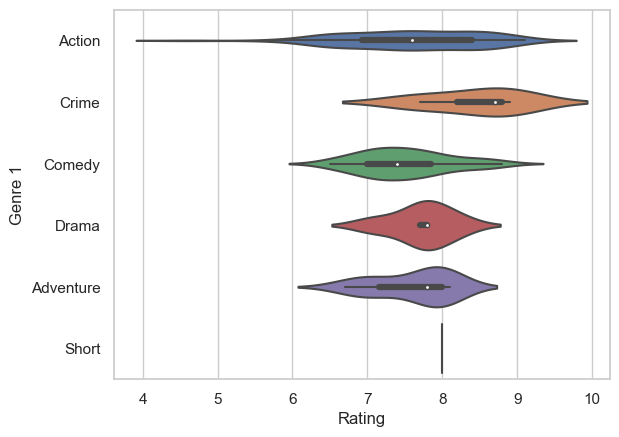

In [79]:
sns.violinplot(data=Anime, x="Rating", y="Genre 1")

<AxesSubplot:xlabel='Rating', ylabel='Genre 2'>

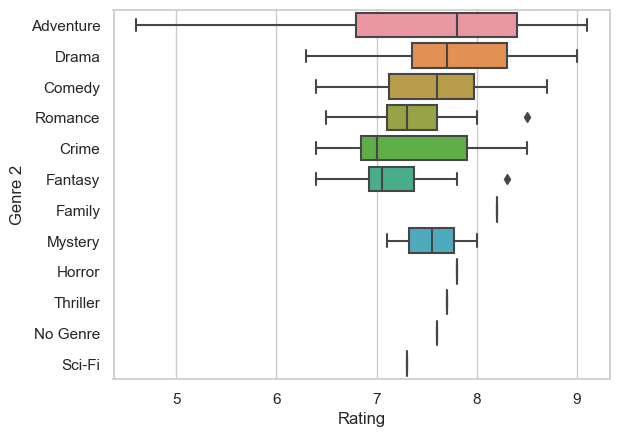

In [80]:
ax = sns.boxplot(x=Anime["Rating"],
                 y=Anime["Genre 2"],
                )
ax

<AxesSubplot:xlabel='Rating', ylabel='Genre'>

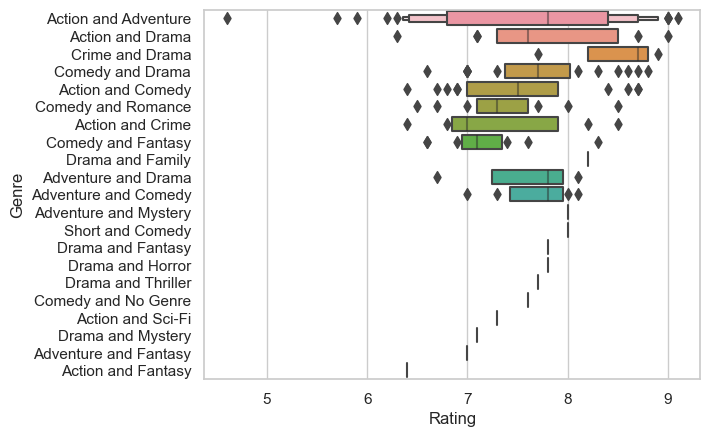

In [81]:
sns.boxenplot(data=Anime, x="Rating", y="Genre")

<AxesSubplot:xlabel='Year', ylabel='Rating'>

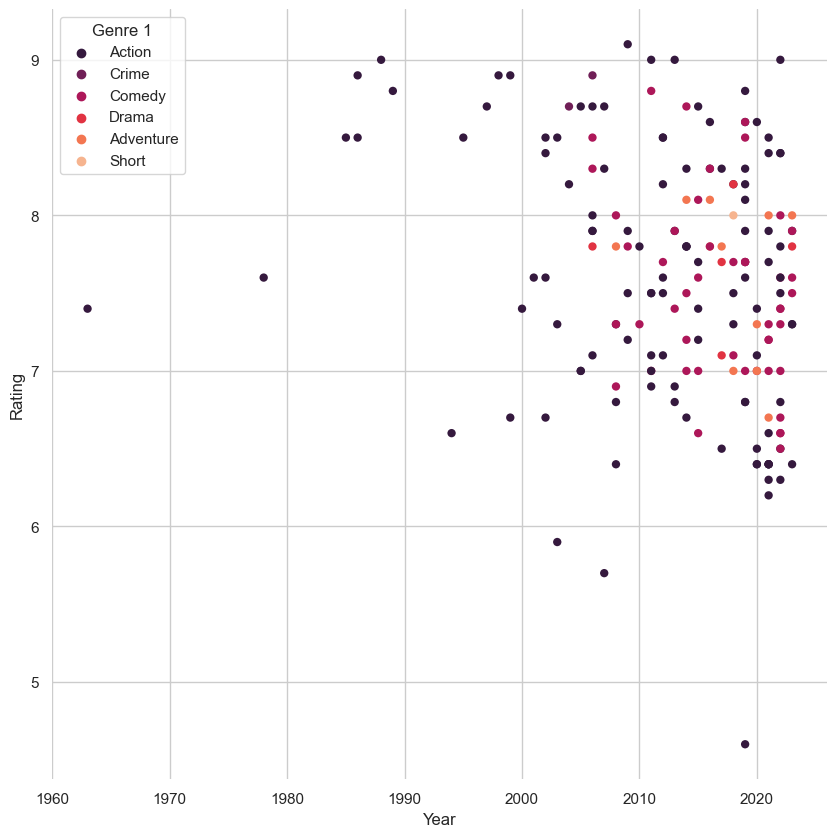

In [74]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)
clarity_ranking = Anime["Genre 1"]
sns.scatterplot(x="Year", y="Rating",
                hue="Genre 1",
                palette="rocket",
                sizes=(10, 60), linewidth=0,
                data=Anime, ax=ax)

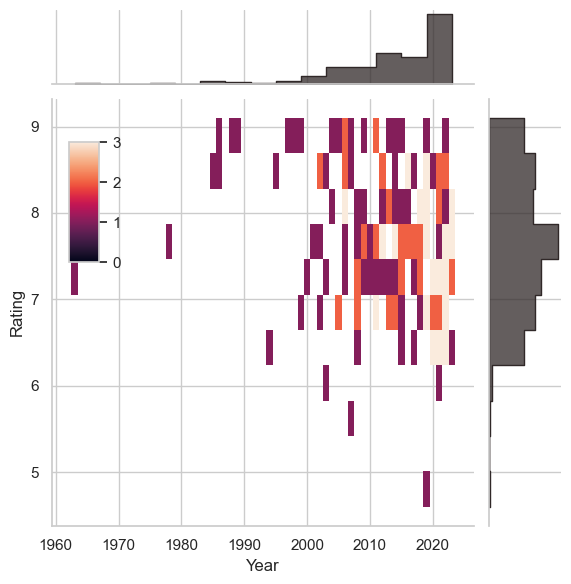

In [75]:
sns.set_theme(style="whitegrid")

g = sns.JointGrid(data=Anime, x="Year", y="Rating", marginal_ticks=False)

g.ax_joint.set(yscale="linear")

cax = g.figure.add_axes([.15, .55, .05, .2])

g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="rocket", pmax=.8,
    cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#302828")